In [1]:
# Import pandas
import pandas as pd

# Specify the path to your text file
file_path = 'C:\\Users\\User\\SDA490\\Calgary1'

# Read the text file and create a DataFrame
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
    # Strip newline characters from each line
    lines = [line.strip() for line in lines if line.strip()]

# Create a DataFrame with a single column "text"
df = pd.DataFrame(lines, columns=['text'])

# Display the first few entries to verify
print(df.head())


                                                text
0  Certainly, for sentiment analysis, let's struc...
1  Gee, I remember not so long ago when ads extol...
2              I'm in NB - Those signs are still up.
3  I'm in NS, and the radio advertisements were g...
4  Also in NB, just want to say I love your usern...


In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each post
df['sentiment_scores'] = df['text'].apply(lambda x: sia.polarity_scores(x))
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Determine the overall sentiment based on the compound score
df['overall_sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Example output
print(df[['text', 'overall_sentiment']].head())


                                                text overall_sentiment
0  Certainly, for sentiment analysis, let's struc...          positive
1  Gee, I remember not so long ago when ads extol...          positive
2              I'm in NB - Those signs are still up.           neutral
3  I'm in NS, and the radio advertisements were g...          positive
4  Also in NB, just want to say I love your usern...          positive


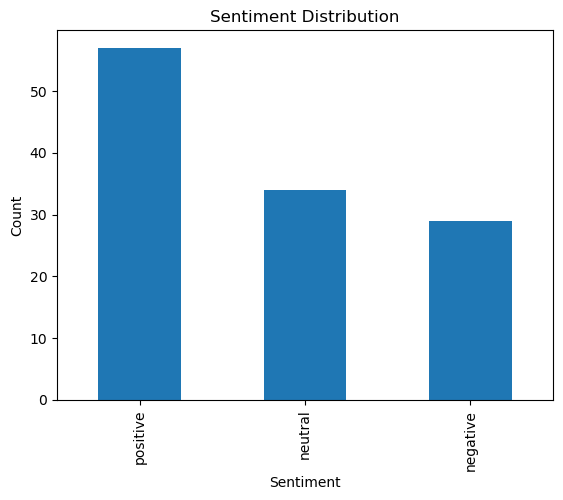

In [3]:
import matplotlib.pyplot as plt

# Sentiment distribution
df['overall_sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['text'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])

# Flatten the list of tokens and count occurrences
all_tokens = [token for sublist in df['tokens'].tolist() for token in sublist]
token_counts = Counter(all_tokens)

# Display the most common terms
print(token_counts.most_common(20))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('people', 21), ('like', 13), ('move', 12), ('calgary', 12), ('housing', 12), ('alberta', 10), ('canada', 10), ('edmonton', 10), ('still', 8), ('toronto', 7), ('cities', 7), ('know', 7), ('province', 7), ('would', 7), ('problem', 7), ('solution', 7), ('make', 6), ('average', 6), ('cost', 6), ('city', 6)]


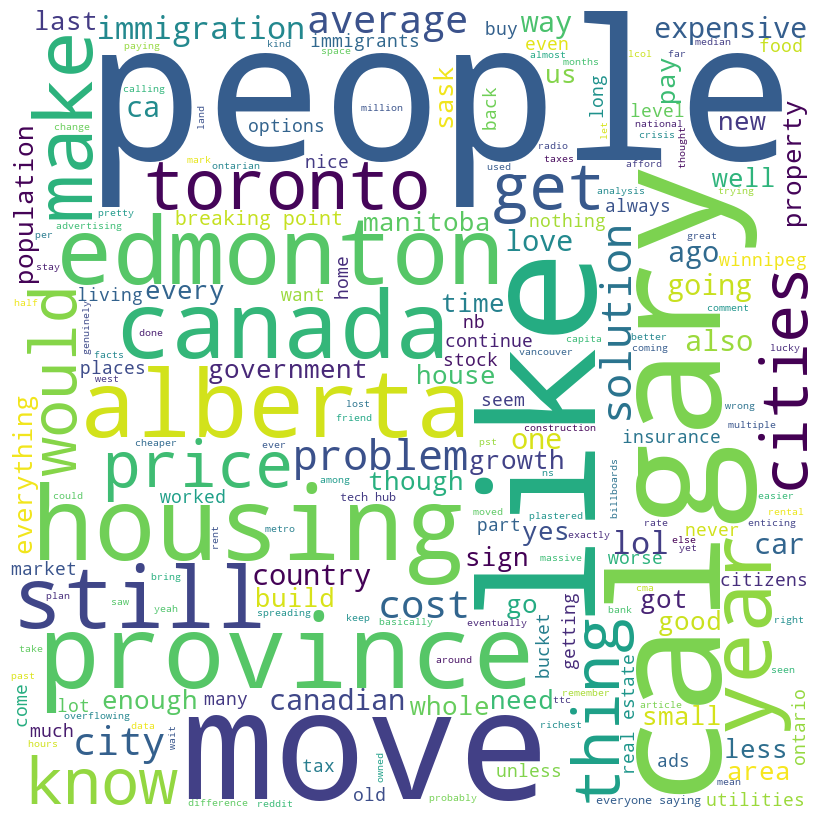

In [5]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(' '.join(all_tokens))

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [6]:
from nltk import ne_chunk, pos_tag
from nltk.tree import Tree

# Define a function to get named entities
def extract_named_entities(text):
    ne_tree = ne_chunk(pos_tag(word_tokenize(text)))
    named_entities = []

    for subtree in ne_tree:
        if type(subtree) == Tree:
            ne_label = subtree.label()
            ne_string = " ".join([token for token, pos in subtree.leaves()])
            named_entities.append((ne_string, ne_label))
    
    return named_entities

# Apply the function and inspect some results
df['named_entities'] = df['text'].apply(extract_named_entities)
df[['text', 'named_entities']].head()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


,text,named_entities
0,"Certainly, for sentiment analysis, let's struc...","[(Reddit, GPE)]"
1,"Gee, I remember not so long ago when ads extol...","[(Gee, GPE), (Alberta, PERSON), (TTC, ORGANIZA..."
2,I'm in NB - Those signs are still up.,"[(NB, GPE)]"
3,"I'm in NS, and the radio advertisements were g...","[(NS, GPE), (Alberta, PERSON)]"
4,"Also in NB, just want to say I love your usern...","[(NB, GPE)]"
